## 결정트리와 앙상블
* 결정 트리는 매우 쉽고 유연하게 적용할 수 있는 알고리즘.   
데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적음.     
예측 성능 향상을 위해 복잡한 규칙 구조를 가져야 함.     
이로 인해 과적합(overfitting)이 발생해 반대로 예측 성능이 저하될 수 있다는 단점

* 그러나 이러한 단점이 앙상블 기법에서는 오히려 장점으로 작용.      
앙상블은 매우 많은 여러개의 약한 학습기(예측 성능이 상대적으로 떨어지는 학습 알고리즘)를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트 하면서 예측 성능을 향상시킴.     
결정트리가 좋은 약한 학습기가 됨(GBM, XGBoost, LightGBM 등)

#### Decision Tree
* 결정 트리 알고리즘은 학습을 통해 데이터에 있는 규칙을 자동으로 찾아내어 트리(Tree) 기반의 분류 규칙을 만듦(If-Else 기반 규칙).
* 따라서 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우함.
* 루트 노드 -(분할)-    
규칙노드(규칙조건, 브랜치/ 서브트리 : 새로운 규칙 노드 기반의 서브 트리 생성) - (분할) -     
                         리프노드(결정된 분류값)     
                         규칙노드 - (분할) - ...

## 정보 균일도 측정 방법
#### 정보 이득(Inforamtion Gain)
* 정보 이득은 엔트로피라는 개념을 기반으로 함.   
엔트로피는 주어진 데이터 집합의 혼잡도를 의미함.    
서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음.      
정보 이득 지수는 1에서 엔트로피 지수를 뺀 값. 즉, 1-엔트로피 지수.      
결정 트리는 이 정보 이득 지수로 분할 기준을 정함. 즉, 정보 이득이 높은 속성을 기준으로 분할함.
&nbsp;
#### 지니 계수
* 지니 계수는 원래 경제학에서 불평등 지수를 나타낼 때 사용하는 계수.    
0이 가장 평등, 1로 갈수록 불평등.   
머신러닝에 적용될 때는 의미론 적으로 재해석돼 데이터가 다양한 값을 가질수록 평등, 특정 값으로 쏠릴 경우에는 불평등한 값.    
즉, 다양성이 낮을 수록 균일도가 높다는 의미, 1로 갈수록 균일도가 높으므로 지니 계수가 높은 속성을 기준으로 분할하는 것.

#### Decision Tree 분할 규칙
* 기본적으로 지니 계수를 이용해 데이터 세트를 분할.
* 정보이득이 높거나 지니 계수가 낮은 조건을 찾아서 자식트리에 노드를 분할.
* 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류 결정.
#### Decision Tree의 특징
* "균일도" 직관적이고 쉽다.
* 트리의 크기를 사전에 제한하는 것이 성능 튜닝에 효과적.    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - 모든 데이터를 만족하는 완벽한 규칙은 만들 수 없음.

##### max_depth
* 트리의 최대 깊이를 규정.
* 디폴트는 None. None으로 설정하면 min_sample_split까지 완전 분할, overfitting 우려.
##### max_features
* 최적 분할을 위해 고려할 최대 피처 개수. 디폴트 None, 모든 피처 사용하여 분할.
* int 형으로 지정하면 대상 피처의 개수, float형으로 지정하면 전체 피처 중 대상 피처의 퍼센트.
* 'sqrt'는 전체 피처 중 √(전체 피처) 개수 만큼 선정
* 'auto'로 지정하면 sqrt와 동일
* 'log'는 전체 피처 중 log2(전체 피처 개수)선정
* 'None'은 전체 피처 선정
##### min_samples_split
* 노드를 분할하기 위한 최소한의 샘플 데이터수로 과적합을 제어하는 데 사용.
* 디폴트는 2이고 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가.
##### min_samples_leaf
* 말단 노드(Leaf)가 되기 위한 최소한의 샘플 데이터 수
* min_samples_split와 유사하게 과적합 제어 용도. 그러나 비대칭적(imbalanced) 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우는 작게 설정 필요.
##### max_leaf_nodes
* 말단 노드(Leaf)의 최대 개수

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state=121)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=11)

# DecisionTreeCalssifier 학습.
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=121)

In [8]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
                feature_names=iris_data.feature_names, impurity=True, filled=True)
# impurity - 불순도를 gini로 보여줌

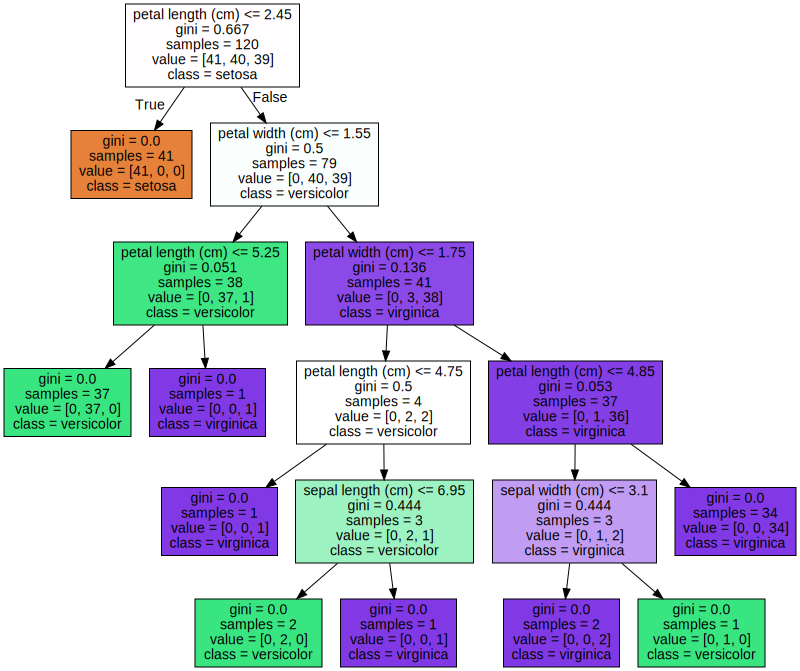

In [9]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz로 읽어서 code 상에서 시각화
with open("tree.dot") as f :
    dot_graph = f.read()
graphviz.Source(dot_graph)

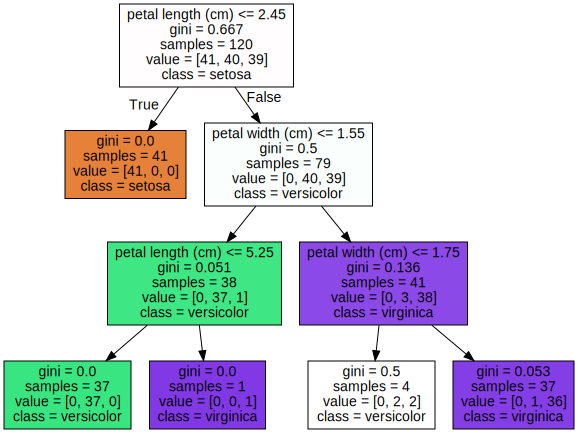

In [10]:
# max_depth=3 짜리 트리  /  보통 홀수 깊이 설정
with open("tree2.dot") as f :
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [11]:
dt_clf.feature_importances_

array([0.01667014, 0.01667014, 0.54656775, 0.42009198])

Feature Importance : [0.017 0.017 0.547 0.42 ]
sepal length (cm) : 0.017
sepal width (cm) : 0.017
petal length (cm) : 0.547
petal width (cm) : 0.420


<AxesSubplot:>

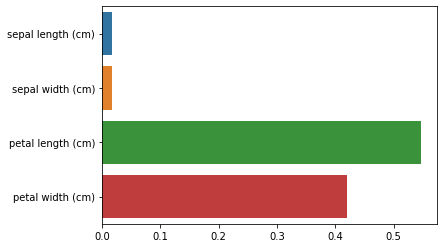

In [13]:
import seaborn as sns
import numpy as np

# feature importance 추출
print(f"Feature Importance : {np.round(dt_clf.feature_importances_, 3)}")

# feature 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_) :
    print(f"{name} : {value:.3f}")

# feature importance를 column별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

## 결정트리 과적합(Overfitting)

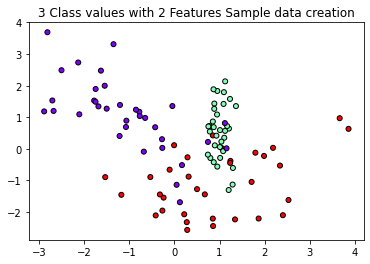

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의
# classification 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0,
                                          n_informative=2, n_classes=3,
                                          n_clusters_per_class=1, random_state=0)

# plot 형태로 2개의 features로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨.
plt.scatter(X_features[:,0], X_features[:,1], marker="o", c=y_labels, s=25,
            cmap="rainbow", edgecolors="k")                                          

In [2]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y) :
    # 서브플롯들의 형태와 개별 플롯
    fig, ax = plt.subplots()

    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap="rainbow", edgecolors="k", 
               clim=(y.min(), y.max()), zorder=3)
    ax.axis("tight")
    ax.axis("off")
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이터로 model 학습
    model.fit(X,y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행
    # meshgrid는 격자모양의 좌표평면
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200),
                         np.linspace(ylim_start, ylim_end, num=200))
    # np.c_는 2차원축을 기준으로 병합 → 평탄화 된 xx와 yy 결합
    # ndarray.ravel는 평탄화
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf()를 이용하여 class boundary를 visualization 수행
    n_classes = len(np.unique(y))
    # levels는 컨투어 라인의 갯수를 나타내는 array, 증가형태여야 함 또는 int
    # X,y는 Z에 들어가는 좌표값들
    # Z는 컨투어가 그려지는 높이 값들
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                          levels=np.arange(n_classes + 1) - 0.5,
                          cmap="rainbow", clim=(y.min(), y.max()),
                          zorder=1)

C:\Users\user\AppData\Local\Temp\ipykernel_7160\3168849625.py:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


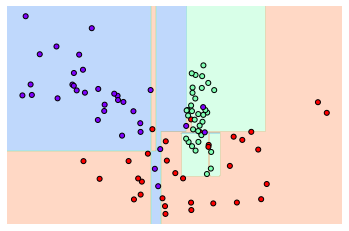

In [3]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정트리의 Decision Boundary 시각화
dt_clf_bdry = DecisionTreeClassifier()
visualize_boundary(dt_clf_bdry, X_features, y_labels)

C:\Users\user\AppData\Local\Temp\ipykernel_7160\3168849625.py:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


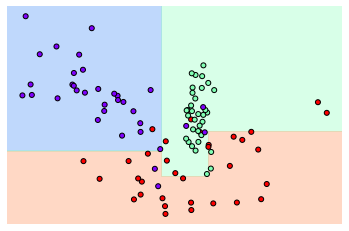

In [4]:
# 특정한 트리 생성 제약없는 결정트리의 Decision Boundary 시각화
dt_clf_bdry_sbj = DecisionTreeClassifier(min_samples_leaf=6)
visualize_boundary(dt_clf_bdry_sbj, X_features, y_labels)

## Ensemble Learning
* 앙상블의 유형은 일반적으로 Voting, Bagging, Boosting 으로 구분, 이외에 Stacking 등의 기법이 있음
* 대표적인 배깅은 Random Forest 알고리즘이 있으며, 부스팅에는 에이다 부스팅, 그래디언트 부스팅, XGBoost, LightGBM 등이 있음.    
배깅은 bootstrap + aggregating  /  데이터 샘플 복원추출 + 집계       
정형 데이터의 분류나 회귀에서는 GBM 부스팅 계열의 앙상블이 전반적으로 높은 예측 성능을 나타냄.
* 넓은 의미로는 서로 다른 모델을 결합한 것들을 앙상블로 지칭하기도 함

##### 앙상블의 특징
* 단일 모델의 약점을 다수의 모델들을 결합하여 보완
* 뛰어난 성능을 가진 모델들로만 구성하는 것보다 성능이 떨어지더라도 서로 다른 유형의 모델을 섞는 것이 오히려 전체 성능에 도움이 될 수 있음
* 랜덤 포레스트 및 뛰어난 부스팅 알고리즘들은 모두 결정 트리 알고리즘을 기반 알고리즘으로 적용함
* 결정 트리의 단점인 overfitting을 수십~수천개의 많은 분류기를 결합해 보완하고 장점인 직관적인 분류 기준은 강화됨

##### Voting Type
* Hard Voting은 단순 다수결
* Soft Voting은 클래스의 확률로 결과를 보정
* 일반적으로 HV 보다는 SV이 예측 성능이 상대적으로 우수하여 주로 사용됨
* 사이킷런은 VotingClassifier 클래스를 통해 Voting을 지원

## Voting Classifier

In [5]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# 개별 모델은 로지스틱 회귀와 KNN
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 Soft Voting 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[("LR",lr_clf), ("KNN", knn_clf)],
                          voting="soft")

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2, random_state=156)

# VotingClassifier 적용
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print(f"Voting 분류기 정확도 : {accuracy_score(y_test, pred): .4f}")

# 개별 모델의 적용
classifiers = [lr_clf, knn_clf]
for classifier in classifiers :
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print(f"{class_name} 정확도 : {accuracy_score(y_test, pred):.4f}")

Voting 분류기 정확도 :  0.9474
LogisticRegression 정확도 : 0.9386
KNeighborsClassifier 정확도 : 0.9386


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

## Decision Tree Prac

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DF로 로드.
featuer_name_df = pd.read_csv("./csv_data/UCI HAR Dataset/UCI HAR Dataset/features.txt", sep="\s+",
                              header=None, names=["column_index", "column_name"])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
featuer_name = featuer_name_df.iloc[:,1].values.tolist()
print(f"전체 피처명에서 10개만 추출 : {featuer_name[:10]}")

전체 피처명에서 10개만 추출 : ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [12]:
feature_dup_df = featuer_name_df.groupby("column_name").count()
feature_dup_df

,column_index
column_name,
"angle(X,gravityMean)",1
"angle(Y,gravityMean)",1
"angle(Z,gravityMean)",1
"angle(tBodyAccJerkMean),gravityMean)",1
"angle(tBodyAccMean,gravity)",1
...,...
tGravityAccMag-max(),1
tGravityAccMag-mean(),1
tGravityAccMag-min(),1


In [10]:
feature_dup_df = featuer_name_df.groupby("column_name").count()
print(feature_dup_df[feature_dup_df["column_index"]>1].count())
feature_dup_df[feature_dup_df["column_index"]>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [14]:
# 중복 feature명에 대해서는 뒤에 번호 붙이는 함수
def get_new_feature_name_df(old_feature_name_df) :
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby("column_name").cumcount(),
                                  columns=["dup_cnt"])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how="outer")
    new_feature_name_df["column_name"] = new_feature_name_df[["column_name", "dup_cnt"]].apply(lambda x : x[0]+"_"+str(x[1])
                                                                                        if x[1]>0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(["index"], axis=1)
    return new_feature_name_df

In [15]:
def get_human_dataset() :

    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    featuer_name_df = pd.read_csv("./csv_data/UCI HAR Dataset/UCI HAR Dataset/features.txt", sep="\s+",
                              header=None, names=["column_index", "column_name"])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df() 를 이용, 신규 피처명 DF 생성
    new_feature_name_df = get_new_feature_name_df(featuer_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    featuer_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터 셋과 테스스 피처 데이터를 DF로 로딩, 컬럼명은 feature_name 적용
    X_train = pd.read_csv("./csv_data/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt",
                          sep="\s+", names=featuer_name)
    X_test = pd.read_csv("./csv_data/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt",
                          sep="\s+", names=featuer_name)

    # 학습 레이블과 테스트 레이블 데이터를 DF로 로딩하고 컬럼명은 action으로 부여
    # "\s+" 데이터 사이 간격 공백으로 구분
    y_train = pd.read_csv("./csv_data/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt",
                          sep="\s+", header=None, names=["action"])
    y_test = pd.read_csv("./csv_data/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt",
                          sep="\s+", header=None, names=["action"])

    # 로드된 학습/테스트용 DF를 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [16]:
print("## 학습 피처 데이터셋 info()")
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [17]:
print(y_train["action"].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [18]:
X_train.isna().sum().sum()  # Null값 확인

0

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f"결정 트리 예측 정확도 : {accuracy:.4f}")

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print(f"DecisionTreeClassifier 기본 하이퍼 파라미터 : \n {dt_clf.get_params()}")

결정 트리 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [21]:
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth" : [6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring="accuracy", cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print(f"GridSearchCV 최고 평균 정확도 수치 : {grid_cv.best_score_}")
print(f"GridSearchCV 최적 하이퍼 파라미터 : {grid_cv.best_params_}")

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8513444970102249
GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 16}


In [22]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[["param_max_depth", "mean_test_score"]]

# 최적 깊이 16

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [23]:
max_depths = [6,8,10,12,16,20,24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths :
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print(f"max_depth = {depth} 정확도 {accuracy:.4f}")

# 최고 정확도 깊이 8

max_depth = 6 정확도 0.8558
max_depth = 8 정확도 0.8707
max_depth = 10 정확도 0.8673
max_depth = 12 정확도 0.8646
max_depth = 16 정확도 0.8575
max_depth = 20 정확도 0.8548
max_depth = 24 정확도 0.8548


In [24]:
params = {
    "max_depth" : [8, 12, 16,20],
    "min_samples_split" : [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring="accuracy", cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print(f"GridSearchCV 최고 평균 정확도 수치 : {grid_cv.best_score_}")
print(f"GridSearchCV 최적 하이퍼 파라미터 : {grid_cv.best_params_}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8548794147162603
GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 8, 'min_samples_split': 16}


In [26]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print(f"결정 트리 예측 정확도 {accuracy:.4f}")

결정 트리 예측 정확도 0.8717


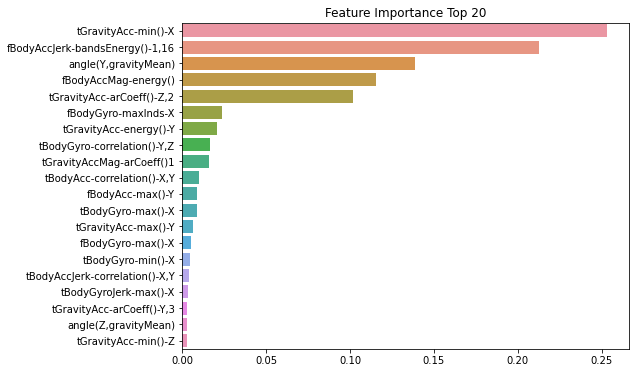

In [27]:
import seaborn as sns

ftr_importance_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importance = pd.Series(ftr_importance_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importance.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title("Feature Importance Top 20")
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### Random Forest

In [5]:
def get_new_feature_name_df(old_feature_name_df) :
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby("column_name").cumcount(),
                                  columns=["dup_cnt"])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how="outer")
    new_feature_name_df["column_name"] = new_feature_name_df[["column_name", "dup_cnt"]].apply(lambda x : x[0]+"_"+str(x[1])
                                                                                        if x[1]>0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(["index"], axis=1)
    return new_feature_name_df

In [6]:
def get_human_dataset() :

    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    featuer_name_df = pd.read_csv("./csv_data/UCI HAR Dataset/UCI HAR Dataset/features.txt", sep="\s+",
                              header=None, names=["column_index", "column_name"])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df() 를 이용, 신규 피처명 DF 생성
    new_feature_name_df = get_new_feature_name_df(featuer_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    featuer_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터 셋과 테스스 피처 데이터를 DF로 로딩, 컬럼명은 feature_name 적용
    X_train = pd.read_csv("./csv_data/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt",
                          sep="\s+", names=featuer_name)
    X_test = pd.read_csv("./csv_data/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt",
                          sep="\s+", names=featuer_name)

    # 학습 레이블과 테스트 레이블 데이터를 DF로 로딩하고 컬럼명은 action으로 부여
    # "\s+" 데이터 사이 간격 공백으로 구분
    y_train = pd.read_csv("./csv_data/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt",
                          sep="\s+", header=None, names=["action"])
    y_test = pd.read_csv("./csv_data/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt",
                          sep="\s+", header=None, names=["action"])

    # 로드된 학습/테스트용 DF를 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# 결정 트리에서 사용한 get_human_dataset()을 이용해 DF반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f"랜덤 포레스트 정확도 : {accuracy:.4f}")

C:\Users\user\AppData\Local\Temp\ipykernel_3876\2941422834.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


랜덤 포레스트 정확도 : 0.9253


In [8]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators" : [100],
    "max_depth" : [6, 8, 10, 12],
    "min_samples_leaf" : [8, 12, 18],
    "min_samples_split" : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSerchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)  # pc의 모든 리소스 사용
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print(f"최적 하이퍼 파라미터 : \n {grid_cv.best_params_}")
print(f"최고 예측 정확도 : {grid_cv.best_score_:.4f}")

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


최적 하이퍼 파라미터 : 
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도 : 0.9180


In [11]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8,
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print(f"예측 정확도 : {accuracy_score(y_test, pred):.4f}")

C:\Users\user\AppData\Local\Temp\ipykernel_3876\2851593926.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf1.fit(X_train, y_train)


예측 정확도 : 0.9165


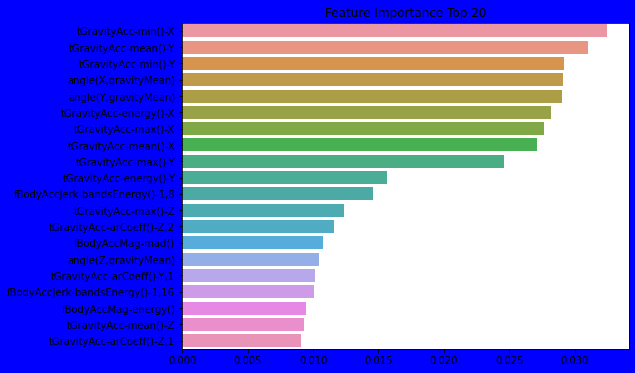

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importance_values = rf_clf1.feature_importances_
ftr_importance = pd.Series(ftr_importance_values, index=X_train.columns)
ftr_top20 = ftr_importance.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title("Feature Importance Top 20")
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()